### EDA and Feature Engineering

In [1]:
import re
import pandas as pd
import datetime as date
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import time
import numpy as np

In [2]:
# data read

In [3]:
data= pd.read_csv('final_congress_bills_data.csv')
selected_columns = ['Sponsor','Committees','Vote Type', 'Vote Result','Cleaned Status']
unique_counts_selected = data[selected_columns].nunique()
print(unique_counts_selected)

Sponsor           410
Committees         38
Vote Type          78
Vote Result        65
Cleaned Status     38
dtype: int64


In [4]:
print("quick look at column types and non-null counts:")
print(data.info(), "\n")

print("basic summary stats for numeric columns:")
display(data.describe())

#summary for all columns, including object types:
display(data.describe(include='all'))


quick look at column types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Columns: 179 entries, Bill Number to Health care costs and insurance
dtypes: float64(168), object(11)
memory usage: 2.7+ MB
None 

basic summary stats for numeric columns:


,Cosponsor Count,Has Cosponsors,Drug trafficking and controlled substances,Fraud offenses and financial crimes,Criminal investigation,Health care coverage and access,Budget process,Sex,Administrative law and regulatory procedures,Cardiovascular and respiratory health,...,Racial and ethnic relations,charitable organizations,alcohol,Government buildings,Health personnel,Agriculture and Food,recognition,Child care and development,Economics and Public Finance,Health care costs and insurance
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,...,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,33.982070,0.787910,0.015881,0.012807,0.028176,0.028176,0.010758,0.032275,0.064037,0.025102,...,0.031762,0.020492,0.010246,0.012807,0.028176,0.026127,0.018443,0.010758,0.022541,0.016906
std,39.864458,0.408893,0.125048,0.112471,0.165518,0.165518,0.103189,0.176774,0.244881,0.156476,...,0.175412,0.141712,0.100728,0.112471,0.165518,0.159554,0.134580,0.103189,0.148473,0.128951
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,123.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Bill Number,Title,Sponsor,Introduced,Committees,Vote Type,Vote Date,Vote Result,Related Bills,Status Date,...,Racial and ethnic relations,charitable organizations,alcohol,Government buildings,Health personnel,Agriculture and Food,recognition,Child care and development,Economics and Public Finance,Health care costs and insurance
count,1952,1952,1952,1952,1952,1952,1952,1952,1952,1952,...,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
unique,1952,1952,410,215,38,78,542,65,1450,268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,HR1,H.R. 1 (118th): Lower Energy Costs Act,Marco Rubio,2023-01-09,House Judiciary,International Affairs,2021-01-04,No Vote 0/0,H.Res. 197,2023-01-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,78,232,387,1512,488,1664,445,170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031762,0.020492,0.010246,0.012807,0.028176,0.026127,0.018443,0.010758,0.022541,0.016906
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.175412,0.141712,0.100728,0.112471,0.165518,0.159554,0.134580,0.103189,0.148473,0.128951
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Exploring distributions across bill categories

C:\Users\kashi\AppData\Local\Temp\ipykernel_32968\3625371499.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sponsors.values, y=top_sponsors.index, palette="Blues_r")


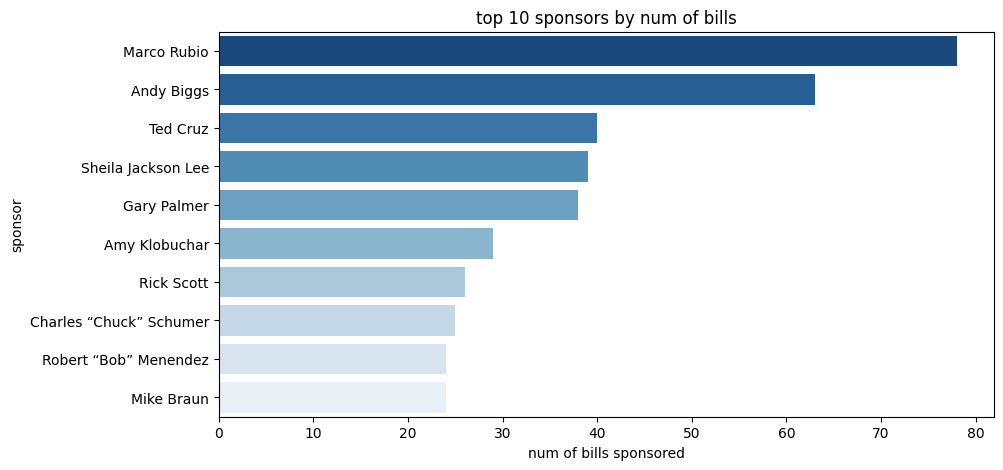

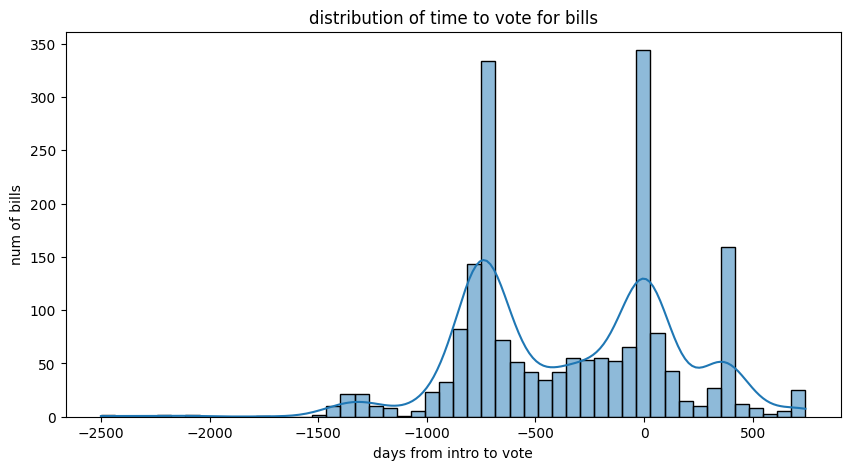

In [5]:
#load time cols
date_columns = ["Introduced", "Vote Date", "Status Date"]

# convert date columns to datetime
for col in date_columns:
	data[col] = pd.to_datetime(data[col], errors='coerce')

# count bills by sponsor (top 10)
top_sponsors = data["Sponsor"].value_counts().head(10)

# plot top sponsors
plt.figure(figsize=(10, 5))
sns.barplot(x=top_sponsors.values, y=top_sponsors.index, palette="Blues_r")
plt.xlabel("num of bills sponsored")
plt.ylabel("sponsor")
plt.title("top 10 sponsors by num of bills")
plt.show()

# calc time from intro to vote date
data["Time_to_Vote"] = (data["Vote Date"] - data["Introduced"]).dt.days

# plot time to vote distrib
plt.figure(figsize=(10, 5))
sns.histplot(data["Time_to_Vote"].dropna(), bins=50, kde=True)
plt.xlabel("days from intro to vote")
plt.ylabel("num of bills")
plt.title("distribution of time to vote for bills")
plt.show()


C:\Users\kashi\AppData\Local\Temp\ipykernel_32968\2140825013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_committees.values, y=top_committees.index, palette="Greens_r")


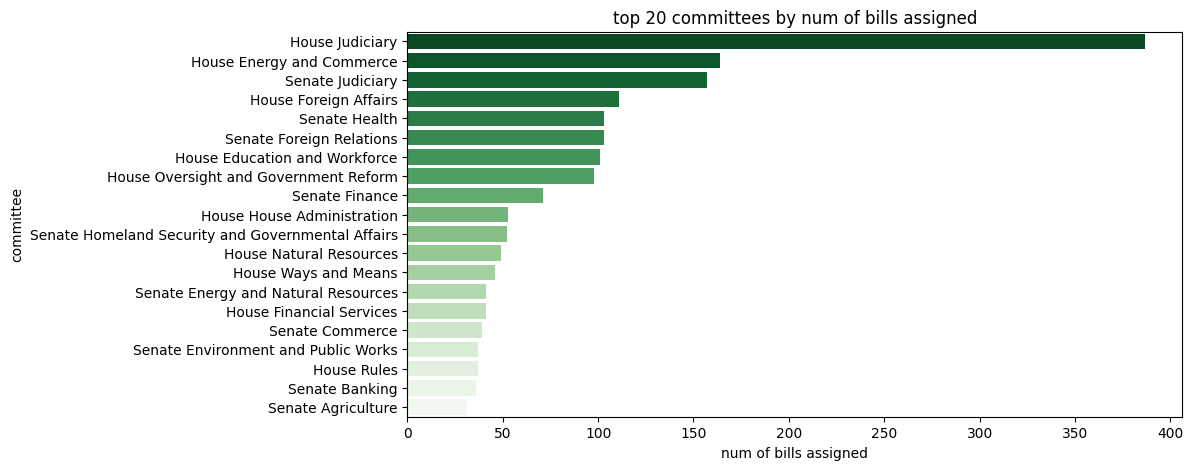

In [6]:
#load comms
top_committees = data["Committees"].value_counts().head(20)

# plot top committees
plt.figure(figsize=(10, 5))
sns.barplot(x=top_committees.values, y=top_committees.index, palette="Greens_r")
plt.xlabel("num of bills assigned")
plt.ylabel("committee")
plt.title("top 20 committees by num of bills assigned")
plt.show()

In [ ]:
# data encode

In [7]:
#spilt bill number into 3 columns, major, sub and number
data['Bill Category'] = data['Bill Number'].apply(
    lambda x: re.match(r'^[A-Za-z\.]+', x).group() if re.match(r'^[A-Za-z\.]+', x) else 'Unknown'
)
data['Bill Order'] = data['Bill Number'].apply(
    lambda x: int(re.search(r'\\d+', x).group()) if re.search(r'\\d+', x) else 0
)

# define helper function for major/sub classification
def categorize_bill(bill_category):
    # lower for consistent matching
    cat_lower = bill_category.lower()
    
    # major category
    if cat_lower.startswith("h"):
        major_category = "house"
    elif cat_lower.startswith("s"):
        major_category = "senate"
    else:
        major_category = "unknown"
    
    # sub category based on known prefixes
    if cat_lower in ["hr", "s"]:
        sub_category = "bill"
    elif cat_lower in ["hres", "sres"]:
        sub_category = "resolution"
    elif cat_lower in ["hjres", "sjres"]:
        sub_category = "joint resolution"
    else:
        sub_category = "unknown"
    
    return major_category, sub_category

# generate major/sub category columns
data[['Major Category', 'Sub Category']] = data['Bill Category'].apply(
    lambda x: pd.Series(categorize_bill(x))
)

#label encode major and sub categories
major_category_encoder = LabelEncoder()
sub_category_encoder = LabelEncoder()

data['Major Category Encoded'] = major_category_encoder.fit_transform(data['Major Category'])
data['Sub Category Encoded'] = sub_category_encoder.fit_transform(data['Sub Category'])

# create final numeric code for the bill number
data['Bill Number Final Encoded'] = (
    data['Major Category Encoded'] * 1000000 +
    data['Sub Category Encoded'] * 10000 +
    data['Bill Order']
)

#show how each category was mapped
major_map = dict(enumerate(major_category_encoder.classes_))
sub_map = dict(enumerate(sub_category_encoder.classes_))

print("major category encoding:", major_map)
print("sub category encoding:", sub_map)

#quick table with a few rows
data[["Bill Number", "Major Category", "Sub Category",
      "Major Category Encoded", "Sub Category Encoded",
      "Bill Number Final Encoded"]].head(100)

major category encoding: {0: 'house', 1: 'senate'}
sub category encoding: {0: 'bill', 1: 'joint resolution', 2: 'resolution'}


,Bill Number,Major Category,Sub Category,Major Category Encoded,Sub Category Encoded,Bill Number Final Encoded
0,HR1,house,bill,0,0,0
1,HR2,house,bill,0,0,0
2,HR3,house,bill,0,0,0
3,HR4,house,bill,0,0,0
4,HR5,house,bill,0,0,0
...,...,...,...,...,...,...
95,HR96,house,bill,0,0,0
96,HR97,house,bill,0,0,0
97,HR98,house,bill,0,0,0
98,HR99,house,bill,0,0,0


C:\Users\kashi\AppData\Local\Temp\ipykernel_32968\1556178212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Major Category", data=data, palette="Set2")


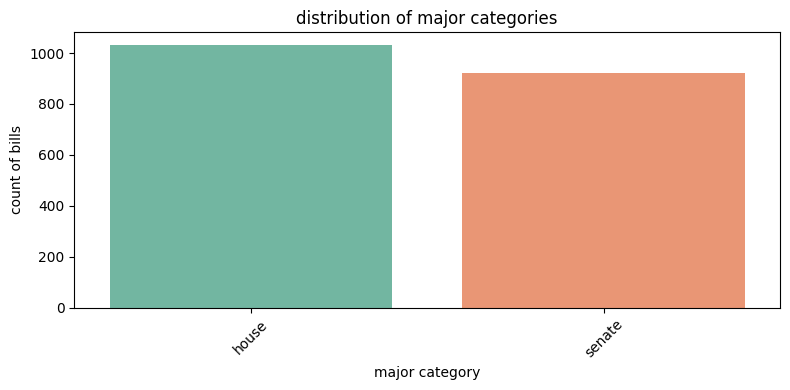

C:\Users\kashi\AppData\Local\Temp\ipykernel_32968\1556178212.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sub Category", data=data, palette="Set3")


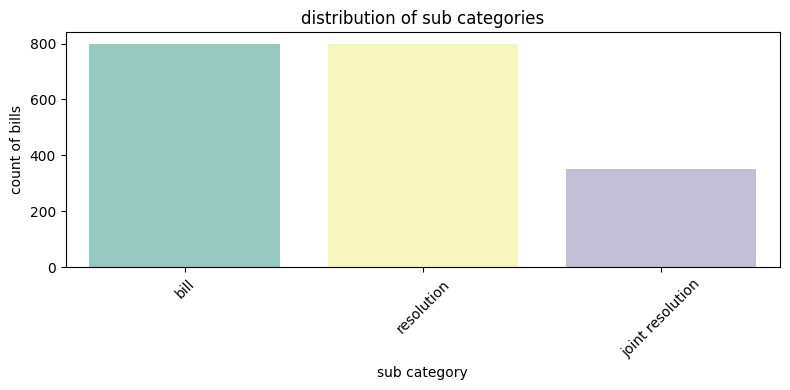

major vs sub category cross-tab:
 Sub Category    bill  joint resolution  resolution
Major Category                                    
house            400               230         400
senate           400               122         400


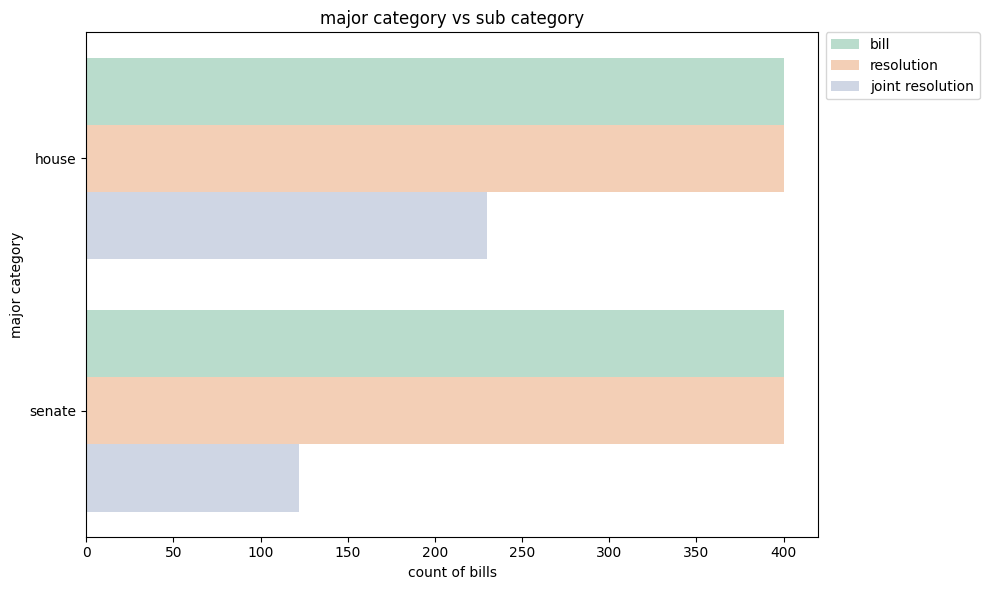

In [8]:
# bar chart for major category distribution
plt.figure(figsize=(8, 4))
sns.countplot(x="Major Category", data=data, palette="Set2")
plt.title("distribution of major categories")
plt.xlabel("major category")
plt.ylabel("count of bills")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# bar chart for sub category distribution
plt.figure(figsize=(8, 4))
sns.countplot(x="Sub Category", data=data, palette="Set3")
plt.title("distribution of sub categories")
plt.xlabel("sub category")
plt.ylabel("count of bills")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# cross-tab for major vs sub category, to see if there's a pattern
cross_tab = pd.crosstab(data["Major Category"], data["Sub Category"])
print("major vs sub category cross-tab:\n", cross_tab)

#combined major and sub
plt.figure(figsize=(10, 6))
sns.countplot(y="Major Category", hue="Sub Category", data=data, palette="Pastel2")
plt.title("major category vs sub category")
plt.xlabel("count of bills")
plt.ylabel("major category")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

In [9]:
#split result into 2 columns, one is [agreed,failed,no resulot],another is the difference of the vote
#define fuction
def extract_vote_details(vote_result):
    if isinstance(vote_result, str):
        # Determine if vote was "Agreed", "Passed" or "Failed"
        outcome = "Agreed" if "Agreed" in vote_result or "Passed" in vote_result or "On Motion" in vote_result else "Failed" if "Failed" in vote_result else "No Result"
        
        # Extract vote counts using regex
        match = re.search(r'(\d+)/(\d+)', vote_result)
        if match:
            votes_for = int(match.group(1))
            votes_against = int(match.group(2))
            vote_difference = votes_for - votes_against
        else:
            vote_difference = None
    else:
        outcome = "No Result"
        vote_difference = None
    
    return outcome, vote_difference
#adding new columns
data[['Vote Outcome', 'Vote Difference']] = data['Vote Result'].apply(lambda x: pd.Series(extract_vote_details(x)))

C:\Users\kashi\AppData\Local\Temp\ipykernel_32968\2804877842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="Set1")


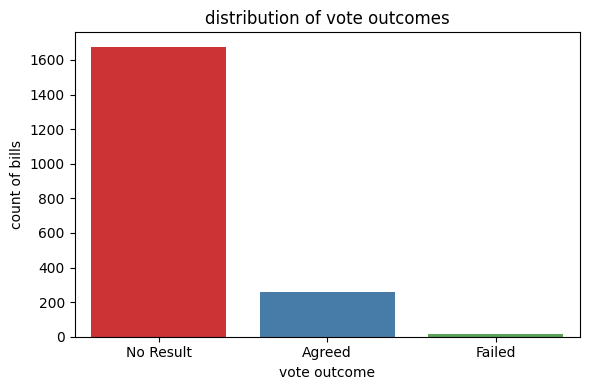

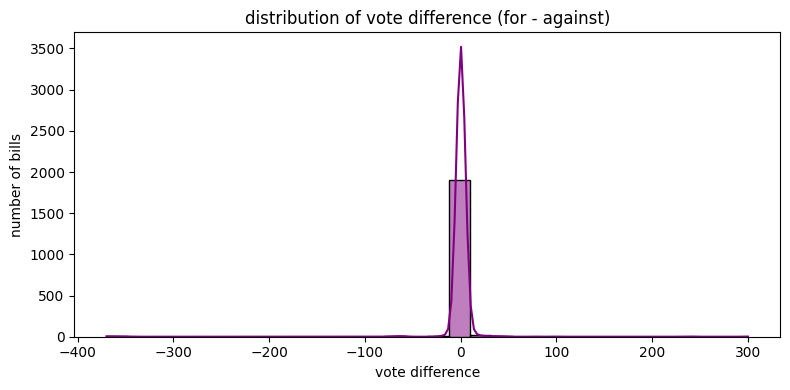

,Vote Result,Vote Outcome,Vote Difference
0,Agreed to 221/208,Agreed,13.0
1,Failed 211/221,Failed,-10.0
2,No Vote 0/0,No Result,0.0
3,No Vote 0/0,No Result,0.0
4,Failed 203/223,Failed,-20.0
5,No Vote 0/0,No Result,0.0
6,No Vote 0/0,No Result,0.0
7,No Vote 0/0,No Result,0.0
8,No Vote 0/0,No Result,0.0
9,No Vote 0/0,No Result,0.0


In [10]:
# bar chart showing distribution of vote outcomes
outcome_counts = data["Vote Outcome"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="Set1")
plt.xlabel("vote outcome")
plt.ylabel("count of bills")
plt.title("distribution of vote outcomes")
plt.tight_layout()
plt.show()

# histogram for vote difference
plt.figure(figsize=(8, 4))
sns.histplot(data["Vote Difference"].dropna(), bins=30, kde=True, color='purple')
plt.title("distribution of vote difference (for - against)")
plt.xlabel("vote difference")
plt.ylabel("number of bills")
plt.tight_layout()
plt.show()

# able of how vote results map to outcome & difference
data[["Vote Result", "Vote Outcome", "Vote Difference"]].head(10)

In [11]:

# pick numeric columns for polynomial expansions
numeric_cols_for_poly = ["Cosponsor Count", "Time_to_Vote"]

# subset these columns
data_poly_subset = data[numeric_cols_for_poly].copy()

# init polynomialfeatures (degree=2 => squares & pairwise interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)

# fit and transform
poly_array = poly.fit_transform(data_poly_subset)

# retrieve the auto-generated feature names
poly_feature_names = poly.get_feature_names_out()

# make a df of new columns
poly_df = pd.DataFrame(poly_array, columns=poly_feature_names)

# join them to the main dataframe
data = pd.concat([data, poly_df], axis=1)

print("shape of data after adding poly features:", data.shape)
print("generated polynomial columns:\n", list(poly_feature_names))

shape of data after adding poly features: (1952, 194)
generated polynomial columns:
 ['Cosponsor Count', 'Time_to_Vote', 'Cosponsor Count^2', 'Cosponsor Count Time_to_Vote', 'Time_to_Vote^2']


In [ ]:
# visulize whole correlation matrix for the subjects

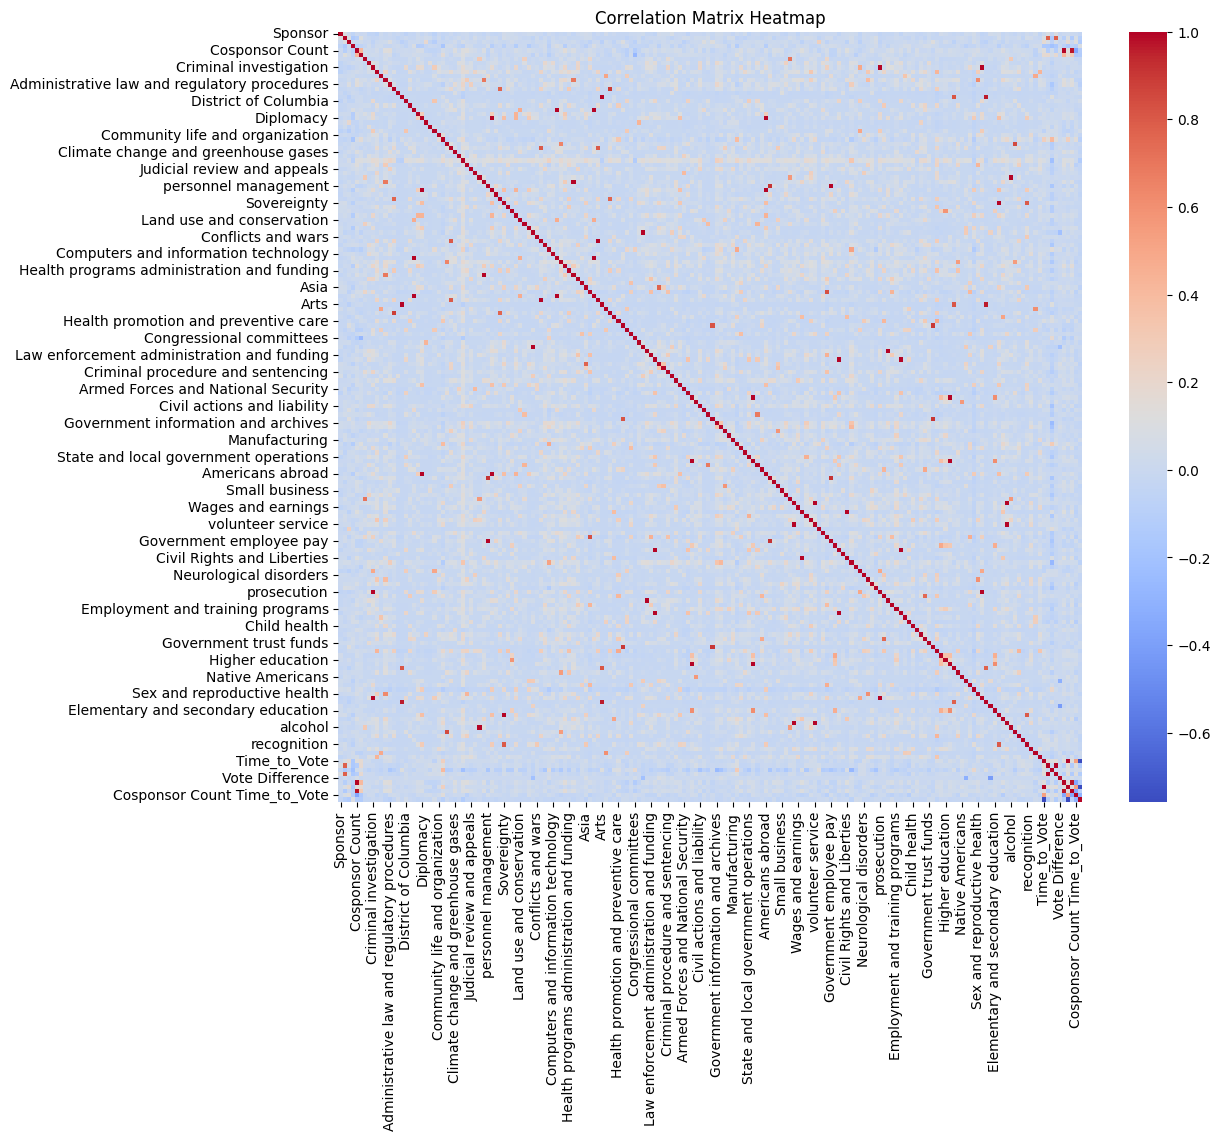

In [12]:
#encode object column as int
#using lable encoder cause too many unique value, by using one-hot encoding, too many columns will be generated
columns_to_encode = ['Sponsor', 'Committees', 'Vote Type', 'Vote Result', 'Cleaned Status','Vote Outcome']
label_encoders = {}
for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].fillna('Unknown'))
data_encoded = data.drop(columns=['Bill Number','Title'])
#drop all str or datetime column to generate corelation matrix
data_matrix = data_encoded.drop(columns=['Introduced','Vote Result','Related Bills','Status Date','Bill Order','Bill Category','Major Category','Sub Category','Vote Outcome', 'Vote Date'])
correlation_matrix_all = data_matrix.corr().fillna(0)
#show the whole feature matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_all, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# top 5% correlation matrix

Loading Data:   0%|          | 0/100 [00:00<?, ?it/s]

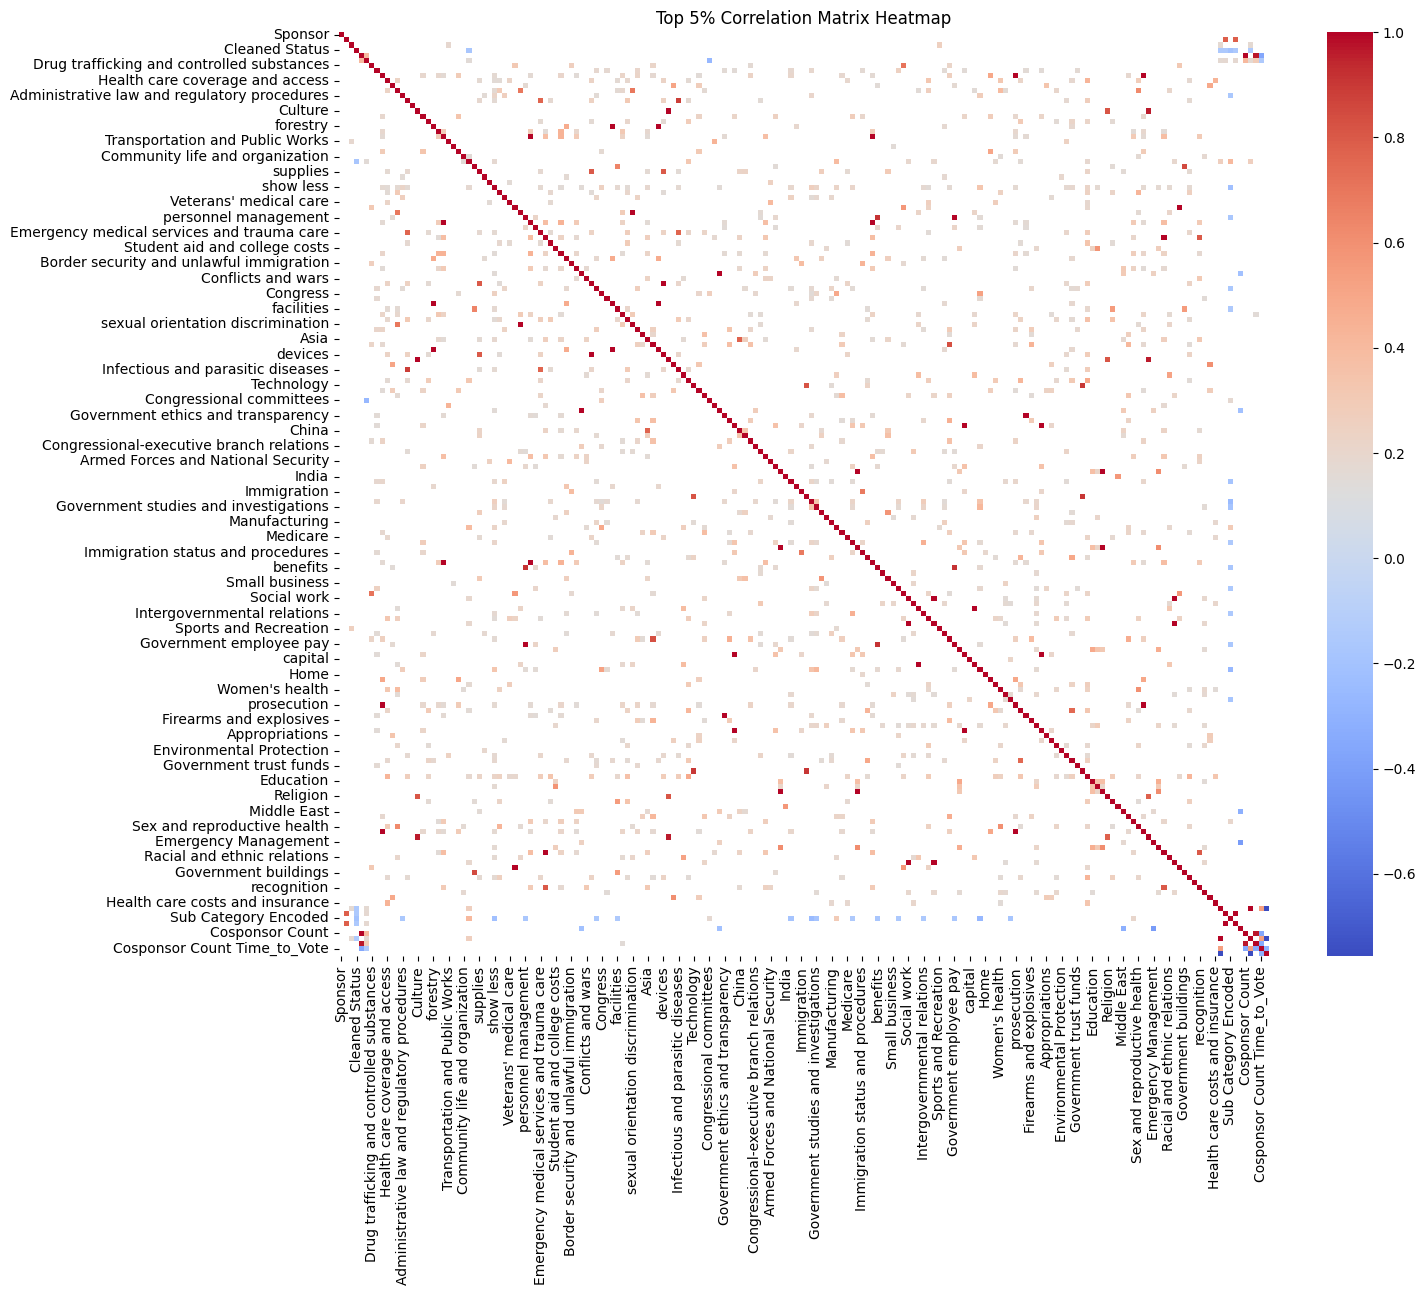

In [13]:
for i in tqdm(range(100), desc="Loading Data"):
    time.sleep(0.1)
#filter out low correlation, set 95% quantile as threshold
abs_corr_matrix = correlation_matrix_all.abs()
#set a mask to only show the bottom part of the plot cause they a symmetry
mask = np.triu(np.ones(abs_corr_matrix.shape, dtype=bool), k=1)
#sort the correlation
corr_values = abs_corr_matrix.where(mask).stack().sort_values(ascending=False)
#compute 95% quantile
top_10_percent_threshold = corr_values.quantile(0.95)
#save the top 5% value and set as nah to the rest
filtered_corr = correlation_matrix_all.where(abs(correlation_matrix_all) >= top_10_percent_threshold)
#plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_corr, cmap="coolwarm")
plt.title("Top 5% Correlation Matrix Heatmap")
plt.show()

In [ ]:
# PCA

In [14]:
data_matrix

,Sponsor,Committees,Vote Type,Cleaned Status,Cosponsor Count,Has Cosponsors,Drug trafficking and controlled substances,Fraud offenses and financial crimes,Criminal investigation,Health care coverage and access,...,Time_to_Vote,Major Category Encoded,Sub Category Encoded,Bill Number Final Encoded,Vote Difference,Cosponsor Count,Time_to_Vote,Cosponsor Count^2,Cosponsor Count Time_to_Vote,Time_to_Vote^2
0,366,0,23,22,123.0,1.0,0.0,0.0,0.0,0.0,...,15,0,0,0,13.0,123.0,15.0,15129.0,1845.0,225.0
1,244,4,45,22,66.0,1.0,0.0,1.0,1.0,0.0,...,9,0,0,0,-10.0,66.0,9.0,4356.0,594.0,81.0
2,238,11,29,19,3.0,0.0,0.0,0.0,0.0,0.0,...,-729,0,0,0,0.0,3.0,-729.0,9.0,-2187.0,531441.0
3,238,11,29,19,3.0,0.0,0.0,0.0,0.0,0.0,...,-729,0,0,0,0.0,3.0,-729.0,9.0,-2187.0,531441.0
4,211,4,22,22,123.0,1.0,0.0,0.0,0.0,0.0,...,22,0,0,0,-20.0,123.0,22.0,15129.0,2706.0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,60,30,32,19,3.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1010000,0.0,3.0,0.0,9.0,0.0,0.0
1948,391,29,32,19,6.0,1.0,0.0,0.0,0.0,0.0,...,-15,1,1,1010000,0.0,6.0,-15.0,36.0,-90.0,225.0
1949,311,34,34,19,6.0,1.0,0.0,0.0,0.0,0.0,...,-1431,1,1,1010000,0.0,6.0,-1431.0,36.0,-8586.0,2047761.0
1950,48,34,32,19,9.0,1.0,0.0,0.0,0.0,0.0,...,-2081,1,1,1010000,0.0,9.0,-2081.0,81.0,-18729.0,4330561.0


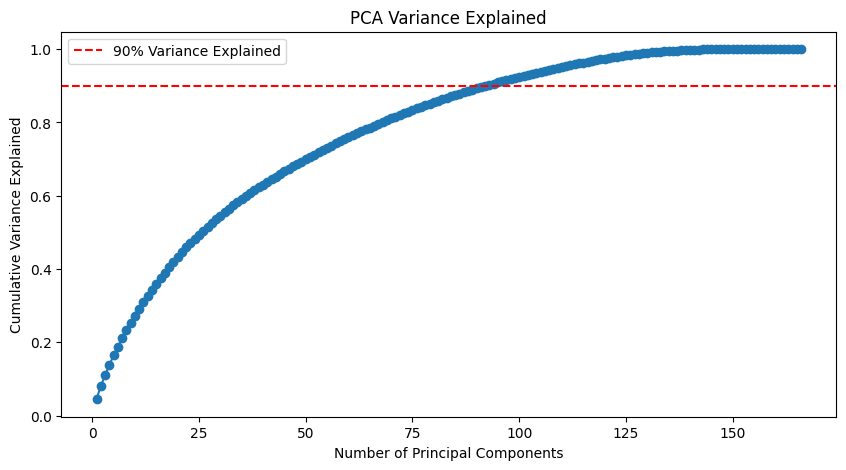

recommend 93 components


In [25]:
#as variables like sponsers, committees, etc. should be the depoendent variables, so we filter it out at first, then do the pca
data_pca=data_matrix.drop(columns=['Cleaned Status','Sponsor','Committees', 'Vote Type','Cosponsor Count','Has Cosponsors','Major Category Encoded','Time_to_Vote','Sub Category Encoded','Bill Number Final Encoded','Vote Difference'])
#standardized the data
scaler = StandardScaler()
data_pca_standard = scaler.fit_transform(data_pca)
#run pca and set minimal component as n
pca= PCA(n_components=min(data_pca_standard.shape))
principal_components = pca.fit_transform(data_pca_standard)
#calculate explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
#find varience>90%
num_components = np.argmax(explained_variance_ratio >= 0.90) + 1
#visulize variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance Explained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("PCA Variance Explained")
plt.legend()
plt.show()
print(f"recommend {num_components} components")
#run pca at recommended components
pca_adjusted = PCA(n_components=num_components)
principal_components_adjusted = pca_adjusted.fit_transform(data_pca_standard)
#generate new dataframe
data_after_pca = pd.DataFrame(principal_components_adjusted, columns=data_matrix.columns[:num_components])

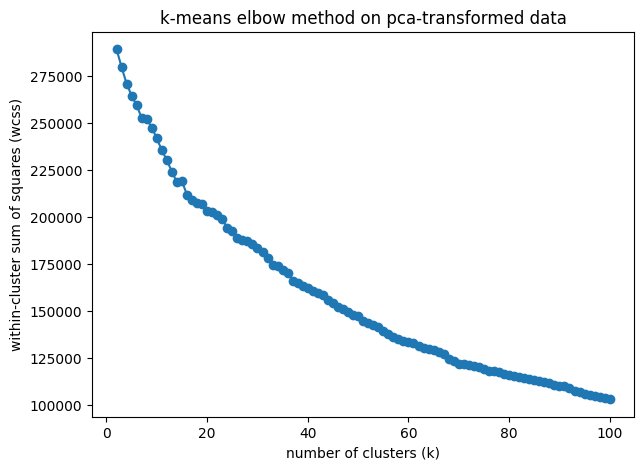

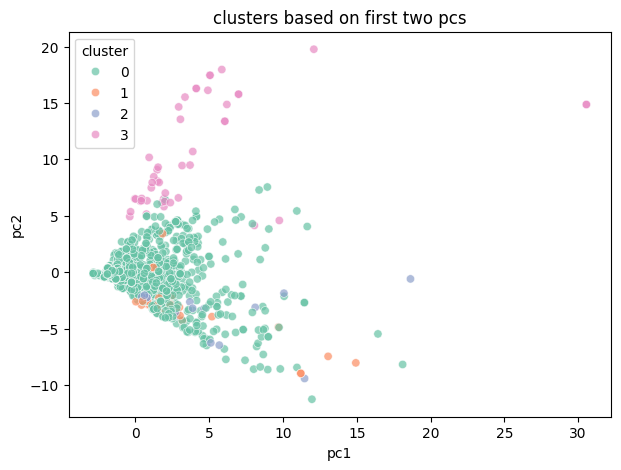

cluster
0    1854
3      46
1      32
2      20
Name: count, dtype: int64


In [26]:
# elbow method to figure out an appropriate number of clusters
wcss = []  # within-cluster sum of squares
max_k = 100

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_after_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(range(2, max_k + 1), wcss, marker='o')
plt.title("k-means elbow method on pca-transformed data")
plt.xlabel("number of clusters (k)")
plt.ylabel("within-cluster sum of squares (wcss)")
plt.show()

#pick a k based on the elbow (e.g., 4)
optimal_k = 4
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_opt.fit_predict(data_after_pca)

# add cluster labels to your pca dataframe (or the original data)
data_after_pca["cluster"] = cluster_labels

#th first two principal components, colored by cluster
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=data_after_pca.iloc[:, 0],
    y=data_after_pca.iloc[:, 1],
    hue=data_after_pca["cluster"],
    palette="Set2",
    alpha=0.7
)
plt.title("clusters based on first two pcs")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.legend(title="cluster")
plt.show()

#ee cluster counts
print(data_after_pca["cluster"].value_counts())


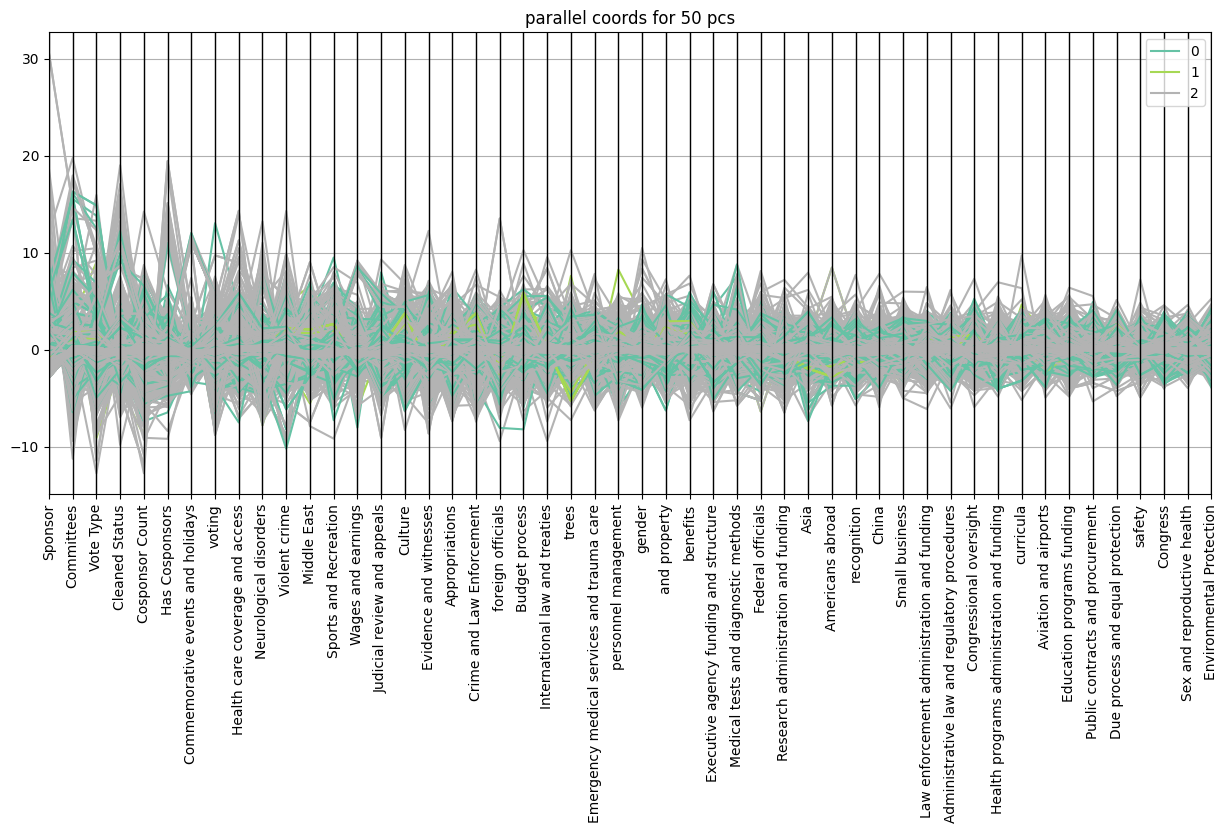

In [ ]:
pca_subset = data_after_pca.iloc[:, :50].copy() #subset 50

pca_subset["VoteOutcome"] = data["Vote Outcome"]  # 0 passed 1 failed 2 no result

plt.figure(figsize=(15, 6))
parallel_coordinates(pca_subset, class_column="VoteOutcome", colormap=plt.get_cmap("Set2"))
plt.title("parallel coords for 50 pcs")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# merging cluster labels to main data
data["cluster"] = cluster_labels

# see how many bills in each cluster
cluster_sizes = data["cluster"].value_counts()
print("bill count per cluster:\n", cluster_sizes, "\n")

# pass/fail distribution by cluster
pass_fail_dist = data.groupby("cluster")["Vote Outcome"].value_counts(normalize=True).unstack()
print("pass/fail dist per cluster:\n", pass_fail_dist, "\n")

# avg cosponsors and time to vote
cosponsor_time_stats = data.groupby("cluster").agg({
    "Cosponsor Count": "mean",
    "Time_to_Vote": "mean"
})
print("avg cosponsors/time_to_vote by cluster:\n", cosponsor_time_stats, "\n")


bill count per cluster:
 cluster
0    1854
3      46
1      32
2      20
Name: count, dtype: int64 

pass/fail dist per cluster:
 Vote Outcome         0         1        2
cluster                                  
0             0.128371  0.009169  0.86246
1             0.156250  0.031250  0.81250
2             0.200000       NaN  0.80000
3             0.239130       NaN  0.76087 

avg cosponsors/time_to_vote by cluster:
          Cosponsor Count  Time_to_Vote
cluster                               
0              33.291262      65.15625
1              48.937500      22.00000
2              34.950000           NaN
3              51.000000           NaN 



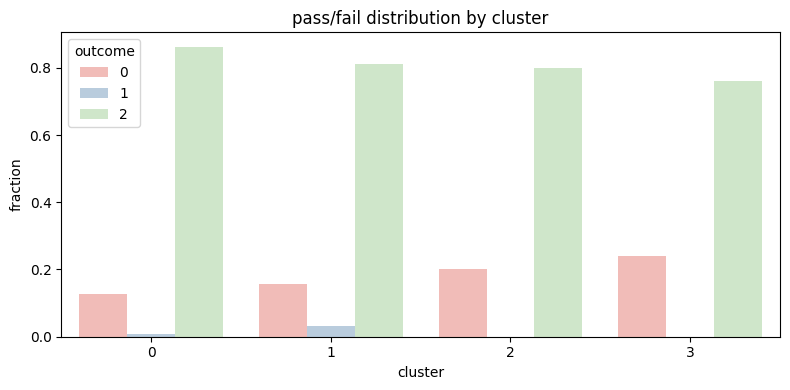

C:\Users\kashi\AppData\Local\Temp\ipykernel_35952\3560553352.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sponsor_counts["count"], y=sponsor_counts["Sponsor_Name"], orient="h", palette="Set2")


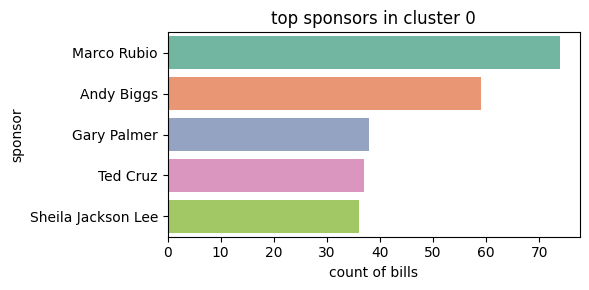

C:\Users\kashi\AppData\Local\Temp\ipykernel_35952\3560553352.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sponsor_counts["count"], y=sponsor_counts["Sponsor_Name"], orient="h", palette="Set2")


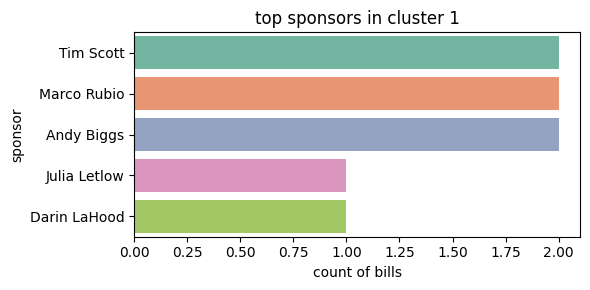

C:\Users\kashi\AppData\Local\Temp\ipykernel_35952\3560553352.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sponsor_counts["count"], y=sponsor_counts["Sponsor_Name"], orient="h", palette="Set2")


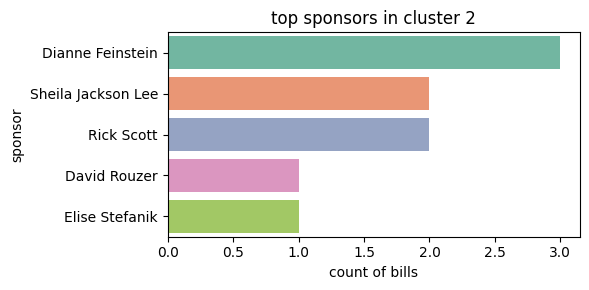

C:\Users\kashi\AppData\Local\Temp\ipykernel_35952\3560553352.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sponsor_counts["count"], y=sponsor_counts["Sponsor_Name"], orient="h", palette="Set2")


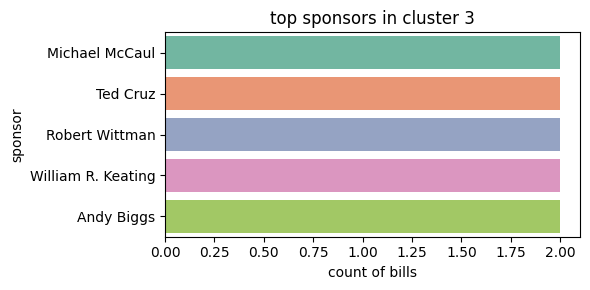

C:\Users\kashi\AppData\Local\Temp\ipykernel_35952\3560553352.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=committee_counts["count"], y=committee_counts["Committee_Name"], orient="h", palette="Set3")


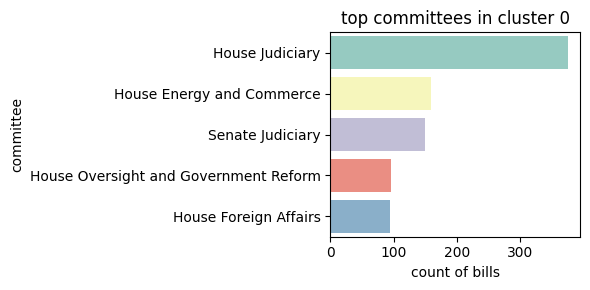

C:\Users\kashi\AppData\Local\Temp\ipykernel_35952\3560553352.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=committee_counts["count"], y=committee_counts["Committee_Name"], orient="h", palette="Set3")


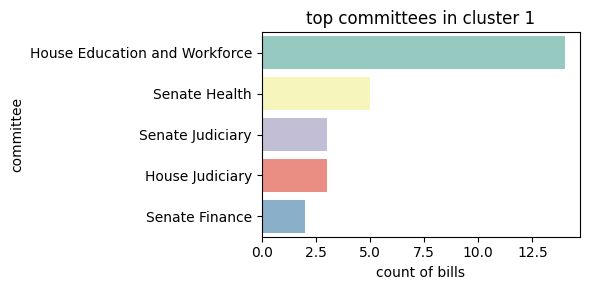

C:\Users\kashi\AppData\Local\Temp\ipykernel_35952\3560553352.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=committee_counts["count"], y=committee_counts["Committee_Name"], orient="h", palette="Set3")


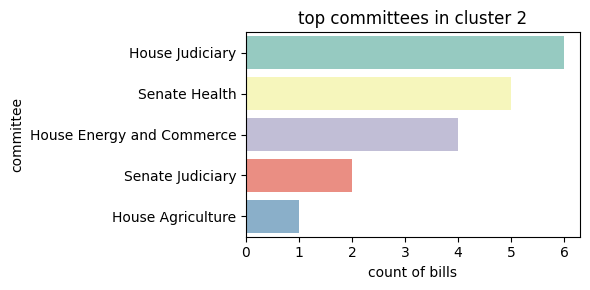

C:\Users\kashi\AppData\Local\Temp\ipykernel_35952\3560553352.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=committee_counts["count"], y=committee_counts["Committee_Name"], orient="h", palette="Set3")


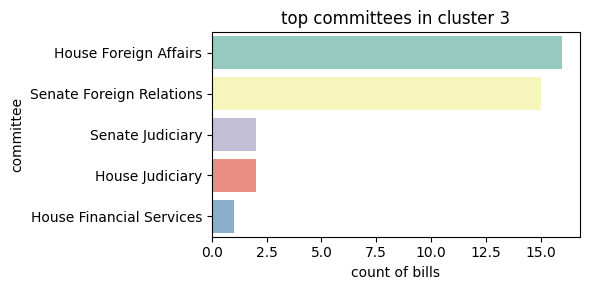

In [ ]:
# pass/fail dist by cluster in a bar chart
pass_fail_long = pass_fail_dist.reset_index().melt(
    id_vars='cluster', var_name='outcome', value_name='fraction'
)

plt.figure(figsize=(8, 4))
sns.barplot(x='cluster', y='fraction', hue='outcome', data=pass_fail_long, palette='Pastel1')
plt.title("pass/fail distribution by cluster")
plt.xlabel("cluster")
plt.ylabel("fraction")
plt.legend(title="outcome")
plt.tight_layout()
plt.show()

# make quick dicts to map encoded sponsor/committee back to original text
sponsor_map = {i: lbl for i, lbl in enumerate(label_encoders["Sponsor"].classes_)}
committee_map = {i: lbl for i, lbl in enumerate(label_encoders["Committees"].classes_)}

# plot top sponsors in each cluster
for c in sorted(data["cluster"].unique()):
    sponsor_counts = (
        data.loc[data["cluster"] == c, "Sponsor"]
        .value_counts()
        .head(5)
        .reset_index(name='count')
    )
    sponsor_counts["Sponsor_Name"] = sponsor_counts["Sponsor"].map(sponsor_map)
    
    plt.figure(figsize=(6, 3))
    sns.barplot(x=sponsor_counts["count"], y=sponsor_counts["Sponsor_Name"], orient="h", palette="Set2")
    plt.title(f"top sponsors in cluster {c}")
    plt.xlabel("count of bills")
    plt.ylabel("sponsor")
    plt.tight_layout()
    plt.show()

# plot top committees in each cluster
for c in sorted(data["cluster"].unique()):
    committee_counts = (
        data.loc[data["cluster"] == c, "Committees"]
        .value_counts()
        .head(5)
        .reset_index(name='count')
    )
    committee_counts["Committee_Name"] = committee_counts["Committees"].map(committee_map)
    
    plt.figure(figsize=(6, 3))
    sns.barplot(x=committee_counts["count"], y=committee_counts["Committee_Name"], orient="h", palette="Set3")
    plt.title(f"top committees in cluster {c}")
    plt.xlabel("count of bills")
    plt.ylabel("committee")
    plt.tight_layout()
    plt.show()

